### Cyber Security – Network Security: Network Intrusions Detection Case Study


### Business Objective:
#### With the enormous growth of computer networks usage and the huge increase in the number of applications running on top of it, network security is becoming increasingly more important. All the computer systems suffer from security vulnerabilities which are both technically difficult and economically costly to be solved by the manufacturers. Therefore, the role of Intrusion Detection Systems (IDSs), as special-purpose devices to detect anomalies and attacks in the network, is becoming more important. 
#### The research in the intrusion detection field has been mostly focused on anomaly-based and misusebased detection techniques for a long time. While misuse-based detection is generally favoured in commercial products due to its predictability and high accuracy, in academic research anomaly detection is typically conceived as a more powerful method due to its theoretical potential for addressing novel attacks.
#### As part of this project, your task is to build network intrusion detection system to detect anomalies and attacks in the network.

### There are two problems:
#### Binomial classification: Detect anomalies by predicting Activity is normal or attack
#### Multinomial Classification: Detecting type of activity by predicting Activity is Normal or Back or Buffer Over flow or FTP Write or Guess Password or Neptune or N-Map or Port Sweep or Root Kit or Satan or Smurf

# Importing Libraries...

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
#import lightgbm as lgb
#from bayes_opt import BayesianOptimization
from sklearn import metrics
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,BaggingClassifier,RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor ,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBRegressor,XGBClassifier
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.preprocessing import StandardScaler
#import keras
#from keras.models import Sequential
#from keras.layers import Dense
from sklearn.utils import resample

# Loading Datasets...

In [122]:
os.chdir('C:\\Users\\Adesh mishra\\OneDrive\\Desktop\\ML  Case study\\New folder (2)')

In [123]:
Attack = pd.read_csv("Data_of_Attack_Back.csv")
Buffer = pd.read_csv("Data_of_Attack_Back_BufferOverflow.csv")

FTP = pd.read_csv("Data_of_Attack_Back_FTPWrite.csv")
Guess = pd.read_csv("Data_of_Attack_Back_GuessPassword.csv")
Neptune = pd.read_csv("Data_of_Attack_Back_Neptune.csv")
NMap = pd.read_csv("Data_of_Attack_Back_NMap.csv")
Normal = pd.read_csv("Data_of_Attack_Back_Normal.csv")
Port = pd.read_csv("Data_of_Attack_Back_PortSweep.csv")
Root = pd.read_csv("Data_of_Attack_Back_RootKit.csv")
Satan = pd.read_csv("Data_of_Attack_Back_Satan.csv")
Smurf = pd.read_csv("Data_of_Attack_Back_Smurf.csv")

# Data Preparation And Cleaning

In [124]:
Attack.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.001,0.001,0.1,0,0.10,0,0.0,0.0,0.0,0.0
1,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.002,0.002,0.1,0,0.05,0,0.0,0.0,0.0,0.0


In [125]:
Attack["attack"] = 1 #adding attack column so that we can perform binomial classification.

In [126]:
Buffer.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0184,0,0.05,0.0,0.01511,0.02957,0,0,0,0.3,...,0.001,0.003,0.1,0,0.10,0.067,0,0,0.0,0.0
1,0.0305,0,0.05,0.0,0.01735,0.02766,0,0,0,0.3,...,0.002,0.004,0.1,0,0.05,0.050,0,0,0.0,0.0


In [127]:
Buffer["attack"] = 1

In [128]:
FTP.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0026,0,0.07,0,0.00116,0.00451,0,0,0.0,0.2,...,0.001,0.001,0.10,0.0,0.10,0.0,0,0,0,0
1,0.0134,0,0.34,0,0.00100,0.39445,0,0,0.2,0.0,...,0.002,0.001,0.05,0.1,0.05,0.0,0,0,0,0


In [129]:
FTP["attack"] = 1

In [130]:
Guess.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0023,0,0.05,0.00,0.00104,0.00276,0,0,0,0.0,...,0.001,0.002,0.1,0,0.1,0.1,0.0,0.0,0.0,0.0
1,0.0060,0,0.05,0.03,0.00125,0.00179,0,0,0,0.1,...,0.001,0.001,0.1,0,0.1,0.0,0.1,0.1,0.0,0.0


In [131]:
Guess["attack"] = 1

In [132]:
Neptune.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.001,0.002,0.1,0.0,0.10,0.100,0.1,0.050,0.0,0.0
1,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.002,0.003,0.1,0.0,0.05,0.067,0.1,0.067,0.0,0.0


In [133]:
Neptune["attack"] = 1

In [134]:
Neptune = resample(Neptune,n_samples=2272,random_state=123)

In [135]:
NMap.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.003,0.001,0.033,0.100,0.033,0.0,0.0,0.0,0,0
1,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.004,0.002,0.050,0.075,0.050,0.0,0.0,0.0,0,0


In [136]:
NMap["attack"] = 1

In [137]:
Normal.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.0,0.0,0.0,0.00215,0.45076,0,0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.00162,0.04528,0,0,0.0,0.0,...,0.001,0.001,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0


In [138]:
Normal["attack"] = 0

In [139]:
Normal = resample(Normal,n_samples=12121,random_state=123)

In [140]:
Port.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0000,0.0,0.14,0.05,0.0,0.0,0,0,0,0.0,...,0.171,0.062,0.027,0.002,0.001,0.003,0.001,0.0,0.029,0.002
1,0.0001,0.0,0.14,0.08,0.0,0.0,0,0,0,0.0,...,0.172,0.062,0.027,0.002,0.001,0.003,0.001,0.0,0.030,0.003


In [141]:
Port["attack"] = 1

In [142]:
Root.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.006,0.0,0.05,0,0.00086,0.00183,0,0,0.0,0.0,...,0.255,0.001,0.000,0.002,0.0,0.0,0,0.0,0.0,0.0
1,0.006,0.0,0.05,0,0.00090,0.00233,0,0,0.0,0.0,...,0.255,0.002,0.001,0.002,0.0,0.0,0,0.0,0.0,0.0


In [143]:
Root["attack"] = 1

In [144]:
Satan.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.02,0.06,0.0,0.0002,0.0,0,0,0,0.0,...,0.143,0.001,0.001,0.004,0.001,0.0,0.001,0.0,0.0,0.0
1,0.0,0.02,0.06,0.0,0.0002,0.0,0,0,0,0.0,...,0.144,0.002,0.001,0.004,0.002,0.0,0.001,0.0,0.0,0.0


In [145]:
Satan["attack"] = 1

In [146]:
Smurf.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.146,0.001,0.001,0.002,0.001,0,0.0,0,0.0,0
1,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.147,0.002,0.001,0.002,0.001,0,0.0,0,0.0,0


In [147]:
Smurf["attack"] = 1

#### Concating all Datasets Together..

In [148]:
df = pd.concat([Attack,Buffer,FTP,Guess,Neptune,NMap,Normal,Port,Root,Satan,Smurf],axis = 0)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28006 entries, 0 to 3006
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      28006 non-null  float64
 1    protocol_type                28006 non-null  float64
 2    service                      28006 non-null  float64
 3    flag                         28006 non-null  float64
 4    src_bytes                    28006 non-null  float64
 5    dst_bytes                    28006 non-null  float64
 6    land                         28006 non-null  int64  
 7    wrong_fragment               28006 non-null  float64
 8    urgent                       28006 non-null  float64
 9    hot                          28006 non-null  float64
 10   num_failed_logins            28006 non-null  float64
 11   logged_in                    28006 non-null  float64
 12   num_compromised              28006 non-null  float64
 13   r

In [150]:
df.attack.value_counts()

1    15885
0    12121
Name: attack, dtype: int64

In [151]:
df.columns

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'attack'],
      dtype='object')

In [152]:
df.columns= df.columns.str.replace(" ","")


In [153]:
df.shape

(28006, 42)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28006 entries, 0 to 3006
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     28006 non-null  float64
 1   protocol_type                28006 non-null  float64
 2   service                      28006 non-null  float64
 3   flag                         28006 non-null  float64
 4   src_bytes                    28006 non-null  float64
 5   dst_bytes                    28006 non-null  float64
 6   land                         28006 non-null  int64  
 7   wrong_fragment               28006 non-null  float64
 8   urgent                       28006 non-null  float64
 9   hot                          28006 non-null  float64
 10  num_failed_logins            28006 non-null  float64
 11  logged_in                    28006 non-null  float64
 12  num_compromised              28006 non-null  float64
 13  root_shell       

In [155]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_error_rate                 0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [156]:
df.duplicated().sum()

147

In [157]:
df.drop_duplicates()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.001,0.100,0.000,0.100,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.002,0.100,0.000,0.050,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.003,0.100,0.000,0.033,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.004,0.100,0.000,0.025,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.005,0.100,0.000,0.020,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.251,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0,1
3003,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.252,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,1
3004,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.253,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,1
3005,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.254,0.100,0.001,0.100,0.0,0.0,0.0,0.0,0.0,1


In [158]:
df["attack"] = df["attack"].astype("object")
df["protocol_type"] = df["protocol_type"].astype("object")
df["service"] = df["service"].astype("object")
df["flag"] = df["flag"].astype("object")

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28006 entries, 0 to 3006
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     28006 non-null  float64
 1   protocol_type                28006 non-null  object 
 2   service                      28006 non-null  object 
 3   flag                         28006 non-null  object 
 4   src_bytes                    28006 non-null  float64
 5   dst_bytes                    28006 non-null  float64
 6   land                         28006 non-null  int64  
 7   wrong_fragment               28006 non-null  float64
 8   urgent                       28006 non-null  float64
 9   hot                          28006 non-null  float64
 10  num_failed_logins            28006 non-null  float64
 11  logged_in                    28006 non-null  float64
 12  num_compromised              28006 non-null  float64
 13  root_shell       

In [160]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,28006.000000,28006.000000,28006.000000,28006.0,28006.000000,28006.000000,28006.000000,28006.000000,28006.000000,28006.000000,...,28006.000000,28006.000000,28006.000000,28006.000000,28006.000000,28006.000000,28006.000000,28006.000000,28006.000000,28006.000000
mean,0.012052,0.022569,0.018121,0.0,0.000011,0.000014,0.008848,0.000218,0.042941,0.003510,...,0.180502,0.127932,0.056782,0.019949,0.027220,0.001967,0.010342,0.012199,0.019732,0.019991
std,0.102820,0.101548,0.055608,0.0,0.001793,0.001464,0.051316,0.005759,0.049500,0.020092,...,0.098952,0.114092,0.046049,0.033656,0.038607,0.005627,0.027503,0.032512,0.034583,0.039557
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.080000,0.002000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.002030,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.255000,0.120000,0.086000,0.001000,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.003180,0.010920,0.0,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,...,0.255000,0.255000,0.100000,0.022000,0.051000,0.001000,0.001000,0.000000,0.025000,0.000000
max,1.000000,1.000000,1.000000,0.0,0.300000,0.200000,1.000000,0.500000,0.100000,0.600000,...,0.255000,0.255000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


In [161]:
df.describe(include="object")

,protocol_type,service,flag,attack
count,28006.0,28006.0,28006.0,28006
unique,3.0,67.0,11.0,2
top,0.0,0.0,0.0,1
freq,21274.0,10637.0,18887.0,15885


In [162]:
#checking unique values in objec cols.
for cols in df.describe(include="object").columns:
    print(cols)
    print(df[cols].unique())
    print("-"*100)

protocol_type
[0.0 0.02 0.01]
----------------------------------------------------------------------------------------------------
service
[0.0 0.05 0.14 0.07 0.34 0.12 0.58 0.51 0.21 0.1 0.47 0.31 0.04 0.16 0.27
 0.57 0.35 0.41 0.15 0.2 0.28 0.52 0.23 0.6 0.18 0.19 0.4 0.17 0.42 0.45
 0.48 0.43 0.54 0.3 0.56 0.13 0.24 0.37 0.29 0.22 0.55 0.49 0.03 0.61 0.33
 0.44 0.59 0.36 0.25 0.26 0.01 0.5 0.46 0.53 0.06 0.09 0.02 0.08 0.39 0.62
 0.11 0.32 0.38 0.63 0.64 0.65 0.67]
----------------------------------------------------------------------------------------------------
flag
[0.0 0.08 0.01 0.02 0.06 0.03 0.07 0.05 0.1 0.09 0.04]
----------------------------------------------------------------------------------------------------
attack
[1 0]
----------------------------------------------------------------------------------------------------


In [163]:
#separating numeric and categorical cols.
conti_df = df.select_dtypes(["int","float"])

cate_df = df.select_dtypes("object")

In [164]:
conti_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.001,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0
1,0.0,0.5454,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.002,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0
2,0.0,0.5454,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.003,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5454,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.004,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0
4,0.0,0.5454,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.005,0.005,0.1,0.0,0.020,0.0,0.0,0.0,0.0,0.0


In [165]:
cate_df.head()

,protocol_type,service,flag,attack
0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,1
2,0.0,0.0,0.0,1
3,0.0,0.0,0.0,1
4,0.0,0.0,0.0,1


In [166]:
## summary stats of all continuous cols..
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

conti_summary=conti_df.apply(lambda x: var_summary(x)).T

In [167]:
conti_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,28006.0,0.0,337.53820,0.012052,0.00000,0.102820,0.010572,0.000,0.000,0.000,0.000,0.000,0.00000,0.00000,0.000000,0.000200,0.837600,1.000
src_bytes,28006.0,0.0,632.07994,0.022569,0.00203,0.101548,0.010312,0.000,0.000,0.000,0.000,0.000,0.00203,0.00318,0.010320,0.018875,0.545400,1.000
dst_bytes,28006.0,0.0,507.49757,0.018121,0.00000,0.055608,0.003092,0.000,0.000,0.000,0.000,0.000,0.00000,0.01092,0.058975,0.083140,0.248373,1.000
land,28006.0,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000
wrong_fragment,28006.0,0.0,0.30000,0.000011,0.00000,0.001793,0.000003,0.000,0.000,0.000,0.000,0.000,0.00000,0.00000,0.000000,0.000000,0.000000,0.300
urgent,28006.0,0.0,0.40000,0.000014,0.00000,0.001464,0.000002,0.000,0.000,0.000,0.000,0.000,0.00000,0.00000,0.000000,0.000000,0.000000,0.200
hot,28006.0,0.0,247.80000,0.008848,0.00000,0.051316,0.002633,0.000,0.000,0.000,0.000,0.000,0.00000,0.00000,0.000000,0.000000,0.200000,1.000
num_failed_logins,28006.0,0.0,6.10000,0.000218,0.00000,0.005759,0.000033,0.000,0.000,0.000,0.000,0.000,0.00000,0.00000,0.000000,0.000000,0.000000,0.500
logged_in,28006.0,0.0,1202.60000,0.042941,0.00000,0.049500,0.002450,0.000,0.000,0.000,0.000,0.000,0.00000,0.10000,0.100000,0.100000,0.100000,0.100
num_compromised,28006.0,0.0,98.30000,0.003510,0.00000,0.020092,0.000404,0.000,0.000,0.000,0.000,0.000,0.00000,0.00000,0.000000,0.000000,0.100000,0.600


In [168]:
#summary stats of all categorical cols..
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts(),x.nunique()], 
                  index=['N', 'NMISS', 'ColumnsNames','Cardinality'])

cate_summary=cate_df.apply(cat_summary).T

In [169]:
cate_summary

,N,NMISS,ColumnsNames,Cardinality
protocol_type,28006,0,0.00 21274 0.02 4082 0.01 2650 Name...,3
service,28006,0,0.00 10637 0.12 7014 0.09 3031 0.10...,67
flag,28006,0,0.00 18887 0.05 3555 0.07 3061 0.08...,11
attack,28006,0,"1 15885 0 12121 Name: attack, dtype: int64",2


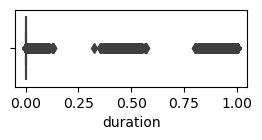

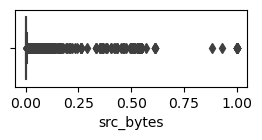

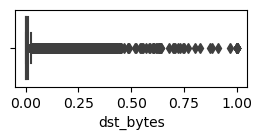

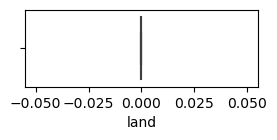

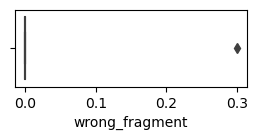

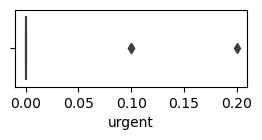

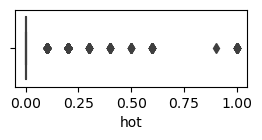

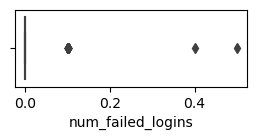

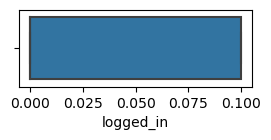

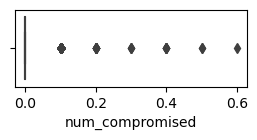

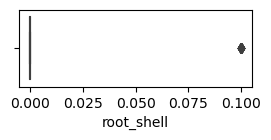

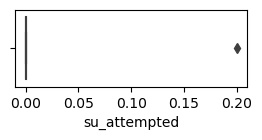

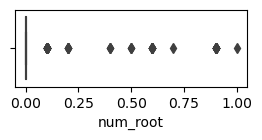

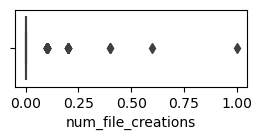

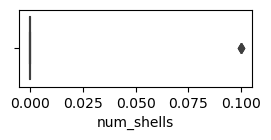

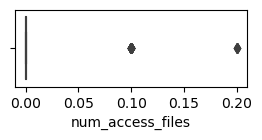

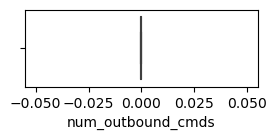

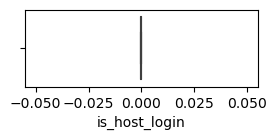

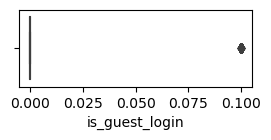

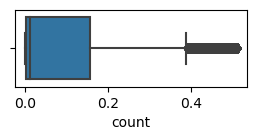

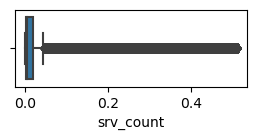

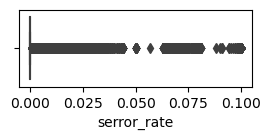

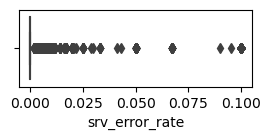

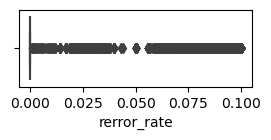

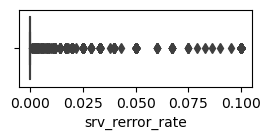

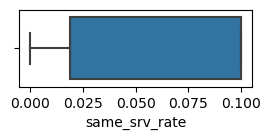

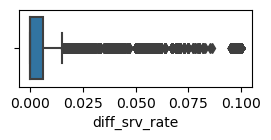

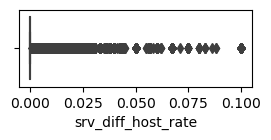

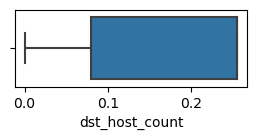

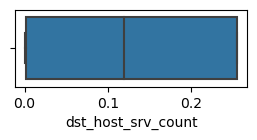

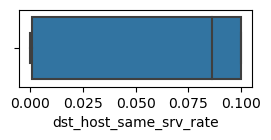

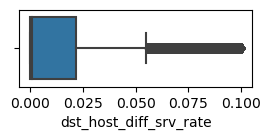

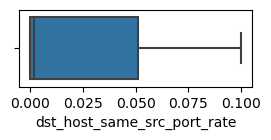

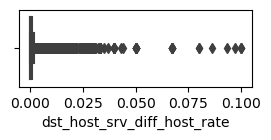

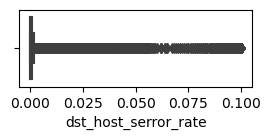

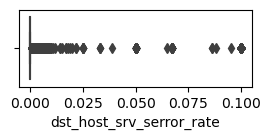

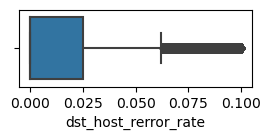

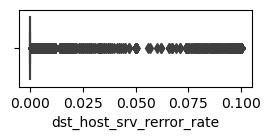

In [170]:
#checking outliers in conti_df
for i in conti_df:
    plt.figure(figsize=(3,1))
    sns.boxplot(data=conti_df,x=i)
    plt.show()

In [171]:
#Outliers Treatment...
conti_df=conti_df.apply( lambda x: x.clip(lower = x.quantile(0.01), 
                                                                upper = x.quantile(0.99)) )

In [172]:
conti_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.54540,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.001,0.001,0.100,0.000,0.100,0.0,0.0,0.0,0.0,0.0
1,0.0,0.54540,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.002,0.002,0.100,0.000,0.050,0.0,0.0,0.0,0.0,0.0
2,0.0,0.54540,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.003,0.003,0.100,0.000,0.033,0.0,0.0,0.0,0.0,0.0
3,0.0,0.54540,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.004,0.004,0.100,0.000,0.025,0.0,0.0,0.0,0.0,0.0
4,0.0,0.54540,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.005,0.005,0.100,0.000,0.020,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.255,0.251,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0
3003,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.255,0.252,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0
3004,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.255,0.253,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0
3005,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.255,0.254,0.100,0.001,0.100,0.0,0.0,0.0,0.0,0.0


In [173]:
new_df = pd.concat([conti_df,cate_df],axis=1)
new_df.head(2)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,attack
0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.5454,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Apply label encoding
for col in cate_df:
    new_df[col] = le.fit_transform(new_df[col])


In [182]:
# Assuming new_df is your DataFrame and cate_df is a list of categorical column names
le = LabelEncoder()

# Apply label encoding
for col in cate_df:
    if col in new_df.columns:
        if new_df[col].isnull().all():
            print(f"Column {col} contains only NaN values.")
            continue
        try:
            new_df[col] = le.fit_transform(new_df[col].astype(str))
        except Exception as e:
            print(f"Error encoding column {col}: {e}")
    else:
        print(f"Column {col} does not exist in new_df.")

# Verify the encoded DataFrame
new_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,attack
0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.100,0.0,0.0,0.0,0.0,0.0,0,0,0,1
1,0.0,0.5454,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.050,0.0,0.0,0.0,0.0,0.0,0,0,0,1
2,0.0,0.5454,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.033,0.0,0.0,0.0,0.0,0.0,0,0,0,1
3,0.0,0.5454,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.025,0.0,0.0,0.0,0.0,0.0,0,0,0,1
4,0.0,0.5454,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.020,0.0,0.0,0.0,0.0,0.0,0,0,0,1


In [183]:
new_df.logged_in.value_counts()

0.0    15980
0.1    12026
Name: logged_in, dtype: int64

In [189]:
#new_df1 = pd.get_dummies(new_df,cate_df,drop_first=True)
#new_df1

In [190]:
# Assuming new_df is DataFrame and cate_df is a list of categorical column names
cate_df = new_df.select_dtypes(include=['object', 'category']).columns 

# Apply one-hot encoding
new_df1 = pd.get_dummies(new_df, columns=cate_df, drop_first=True)

# Verify the encoded DataFrame
new_df1.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,attack
0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.100,0.0,0.0,0.0,0.0,0.0,0,0,0,1
1,0.0,0.5454,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.050,0.0,0.0,0.0,0.0,0.0,0,0,0,1
2,0.0,0.5454,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.033,0.0,0.0,0.0,0.0,0.0,0,0,0,1
3,0.0,0.5454,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.025,0.0,0.0,0.0,0.0,0.0,0,0,0,1
4,0.0,0.5454,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.020,0.0,0.0,0.0,0.0,0.0,0,0,0,1


In [191]:
(new_df.attack.value_counts()/len(new_df)*100)

1    56.719989
0    43.280011
Name: attack, dtype: float64

In [192]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28006 entries, 0 to 3006
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     28006 non-null  float64
 1   src_bytes                    28006 non-null  float64
 2   dst_bytes                    28006 non-null  float64
 3   land                         28006 non-null  int64  
 4   wrong_fragment               28006 non-null  float64
 5   urgent                       28006 non-null  float64
 6   hot                          28006 non-null  float64
 7   num_failed_logins            28006 non-null  float64
 8   logged_in                    28006 non-null  float64
 9   num_compromised              28006 non-null  float64
 10  root_shell                   28006 non-null  float64
 11  su_attempted                 28006 non-null  float64
 12  num_root                     28006 non-null  float64
 13  num_file_creation

In [193]:
#taking out vif  NO.1
x_new = new_df[new_df.columns.difference(["attack"])]
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_new.values,i) for i in range(x_new.shape[1])]
vif["features"] = x_new.columns

In [194]:
vif[vif["VIF Factor"]>=8].sort_values(by="VIF Factor",ascending=False)

,VIF Factor,features
36,222.853001,srv_error_rate
12,188.468643,dst_host_srv_serror_rate
37,92.236230,srv_rerror_rate
28,69.889242,rerror_rate
11,58.392958,dst_host_srv_rerror_rate
31,49.575005,serror_rate
7,38.284405,dst_host_same_srv_rate
30,28.933440,same_srv_rate
14,24.864836,flag
8,22.880619,dst_host_serror_rate


In [195]:
#taking out vif  NO.2
x_new = x_new.drop(columns=["srv_error_rate"])

In [196]:
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_new.values,i) for i in range(x_new.shape[1])]
vif["features"] = x_new.columns

In [197]:
vif[vif["VIF Factor"]>=8].sort_values(by="VIF Factor",ascending=False)

,VIF Factor,features
36,83.499424,srv_rerror_rate
28,62.853276,rerror_rate
11,58.366138,dst_host_srv_rerror_rate
12,42.002190,dst_host_srv_serror_rate
31,39.019545,serror_rate
7,38.262872,dst_host_same_srv_rate
30,28.931674,same_srv_rate
14,24.541074,flag
8,21.750081,dst_host_serror_rate
9,21.419514,dst_host_srv_count


In [198]:
#taking out vif  NO.3
x_new = x_new.drop(columns=["srv_rerror_rate"])

In [199]:
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_new.values,i) for i in range(x_new.shape[1])]
vif["features"] = x_new.columns

In [200]:
vif[vif["VIF Factor"]>=8].sort_values(by="VIF Factor",ascending=False)

,VIF Factor,features
28,46.160545,rerror_rate
11,38.311968,dst_host_srv_rerror_rate
7,38.262079,dst_host_same_srv_rate
31,34.382698,serror_rate
12,29.330842,dst_host_srv_serror_rate
30,28.912485,same_srv_rate
14,23.698521,flag
8,21.595347,dst_host_serror_rate
9,21.334469,dst_host_srv_count
27,19.565592,protocol_type


In [201]:
#taking out vif  NO.4
x_new = x_new.drop(columns=["rerror_rate"])

In [202]:
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_new.values,i) for i in range(x_new.shape[1])]
vif["features"] = x_new.columns

In [203]:
vif[vif["VIF Factor"]>=8].sort_values(by="VIF Factor",ascending=False)

,VIF Factor,features
7,38.242119,dst_host_same_srv_rate
29,28.183826,same_srv_rate
30,25.586459,serror_rate
11,22.174970,dst_host_srv_rerror_rate
12,22.031616,dst_host_srv_serror_rate
8,21.301964,dst_host_serror_rate
9,21.277239,dst_host_srv_count
14,20.342817,flag
27,18.806630,protocol_type
19,17.492237,logged_in


In [204]:
#taking out vif  NO.5
x_new = x_new.drop(columns=["dst_host_same_srv_rate"])

In [205]:
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_new.values,i) for i in range(x_new.shape[1])]
vif["features"] = x_new.columns

In [206]:
vif[vif["VIF Factor"]>=8].sort_values(by="VIF Factor",ascending=False)

,VIF Factor,features
29,25.493457,serror_rate
28,23.870477,same_srv_rate
10,22.143017,dst_host_srv_rerror_rate
11,22.008807,dst_host_srv_serror_rate
7,21.298599,dst_host_serror_rate
13,20.306920,flag
26,17.481540,protocol_type
18,16.408792,logged_in
20,11.479714,num_compromised
8,10.690657,dst_host_srv_count


In [207]:
#taking out vif  NO.6
x_new = x_new.drop(columns=["flag"])

In [208]:
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_new.values,i) for i in range(x_new.shape[1])]
vif["features"] = x_new.columns

In [209]:
vif[vif["VIF Factor"]>=8].sort_values(by="VIF Factor",ascending=False)

,VIF Factor,features
28,24.882833,serror_rate
27,23.797455,same_srv_rate
7,21.231586,dst_host_serror_rate
25,17.350976,protocol_type
17,16.314082,logged_in
11,12.408118,dst_host_srv_serror_rate
10,11.889503,dst_host_srv_rerror_rate
19,11.105356,num_compromised
8,10.669254,dst_host_srv_count
0,10.027387,count


In [210]:
#taking out vif  NO.7
x_new = x_new.drop(columns=["serror_rate"])

In [211]:
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_new.values,i) for i in range(x_new.shape[1])]
vif["features"] = x_new.columns

In [212]:
vif[vif["VIF Factor"]>=8].sort_values(by="VIF Factor",ascending=False)

,VIF Factor,features
27,23.173540,same_srv_rate
25,17.337612,protocol_type
17,16.179661,logged_in
10,11.294414,dst_host_srv_rerror_rate
19,11.080137,num_compromised
8,10.625312,dst_host_srv_count
11,10.359205,dst_host_srv_serror_rate
0,9.983127,count
28,9.563522,service
13,9.458613,hot


In [213]:
#taking out vif  NO.8
x_new = x_new.drop(columns=["same_srv_rate"])

In [214]:
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_new.values,i) for i in range(x_new.shape[1])]
vif["features"] = x_new.columns

In [215]:
vif.sort_values(by="VIF Factor",ascending=False)

,VIF Factor,features
25,14.514076,protocol_type
19,11.067017,num_compromised
27,9.501153,service
8,9.497030,dst_host_srv_count
13,9.419643,hot
17,9.324331,logged_in
5,8.888582,dst_host_rerror_rate
11,8.856200,dst_host_srv_serror_rate
0,8.690163,count
28,8.609319,src_bytes


In [223]:
x_new.shape

(28006, 34)

### Building Model

In [224]:
target = new_df[["attack"]]#y_vars
features = x_new              #x_vars

In [225]:
#Splitting the data for sklearn methods
train_y, test_y, train_X, test_X = train_test_split(target,features, test_size=0.2, random_state=142)

In [226]:
#features_imprtances

rf= RandomForestClassifier()
rf.fit(train_X,train_y)

RandomForestClassifier()

In [227]:
imp_var=list(pd.DataFrame(list(zip(list(train_X.columns),list(rf.feature_importances_))),
             columns=['Var','Imp']).sort_values(by='Imp',ascending=False).head(30)["Var"])

In [228]:
imp_var

['service',
 'dst_bytes',
 'logged_in',
 'src_bytes',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'protocol_type',
 'dst_host_srv_diff_host_rate',
 'count',
 'dst_host_same_src_port_rate',
 'dst_host_rerror_rate',
 'diff_srv_rate',
 'num_compromised',
 'hot',
 'dst_host_srv_rerror_rate',
 'dst_host_serror_rate',
 'dst_host_count',
 'srv_count',
 'srv_diff_host_rate',
 'dst_host_srv_serror_rate',
 'duration',
 'urgent',
 'su_attempted',
 'root_shell',
 'num_file_creations',
 'num_shells',
 'num_root',
 'num_outbound_cmds',
 'num_failed_logins',
 'num_access_files']

In [229]:
train_X[imp_var].shape

(22404, 30)

# PROBLEM -1 Binomial classification

#### Logistic Regression 

In [230]:
lr = LogisticRegression()
lr.fit(train_X[imp_var],train_y)

LogisticRegression()

In [231]:
print(metrics.classification_report(train_y,lr.predict(train_X[imp_var])))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      9738
           1       0.97      0.99      0.98     12666

    accuracy                           0.98     22404
   macro avg       0.98      0.98      0.98     22404
weighted avg       0.98      0.98      0.98     22404



In [232]:
metrics.roc_auc_score(train_y,lr.predict(train_X[imp_var]))

0.9801152585227026

In [233]:
print(metrics.classification_report(test_y,lr.predict(test_X[imp_var])))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2383
           1       0.98      0.99      0.99      3219

    accuracy                           0.98      5602
   macro avg       0.99      0.98      0.98      5602
weighted avg       0.98      0.98      0.98      5602



In [234]:
metrics.roc_auc_score(test_y,lr.predict(test_X[imp_var]))

0.9828900267857247

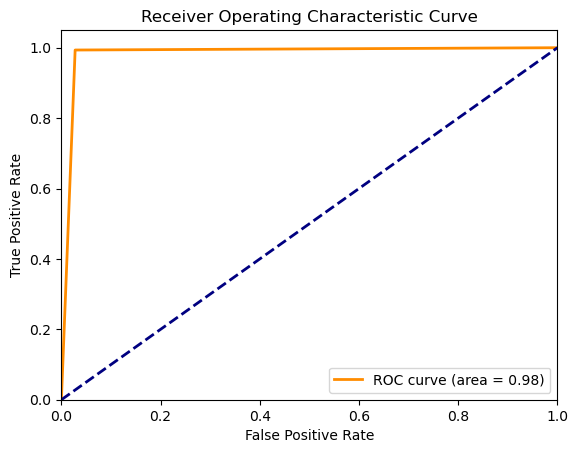

In [235]:

fpr, tpr, _ = metrics.roc_curve(test_y,lr.predict(test_X[imp_var]))
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

###### The model perfectly discriminates between positive and negative classes our curve also very close to one 

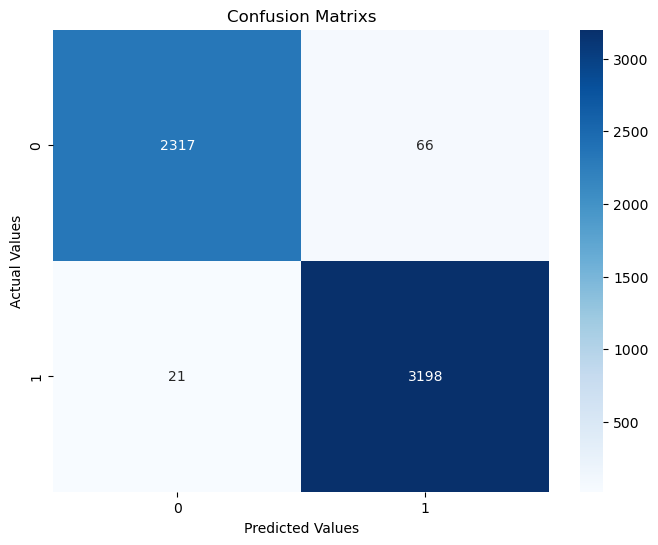

In [236]:
cm = metrics.confusion_matrix(test_y,lr.predict(test_X[imp_var]))
plt.figure(figsize=(8,6))
sns.heatmap(cm , annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrixs")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

###### Confusion matrix visualizes the model's predictions:

- True Negatives (correctly identified normal activities): 3188
- False Positives (normal activities misidentified as attacks): 60
- False Negatives (attacks misidentified as normal activities): 31
- True Positives (correctly identified attacks activities): 2323
- The model shows a very low error rate, with only a few misidentification in both directions.

In [237]:
metrics.accuracy_score(test_y,lr.predict(test_X[imp_var]))

0.9844698322027847

#### Decision Tree Classifier

In [238]:
dt = DecisionTreeClassifier()
dt.fit(train_X[imp_var],train_y)

DecisionTreeClassifier()

In [239]:
print(metrics.classification_report(test_y,dt.predict(test_X[imp_var])))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2383
           1       1.00      1.00      1.00      3219

    accuracy                           1.00      5602
   macro avg       1.00      1.00      1.00      5602
weighted avg       1.00      1.00      1.00      5602



In [240]:
metrics.roc_auc_score(test_y,dt.predict(test_X[imp_var]))

0.9960842156639977

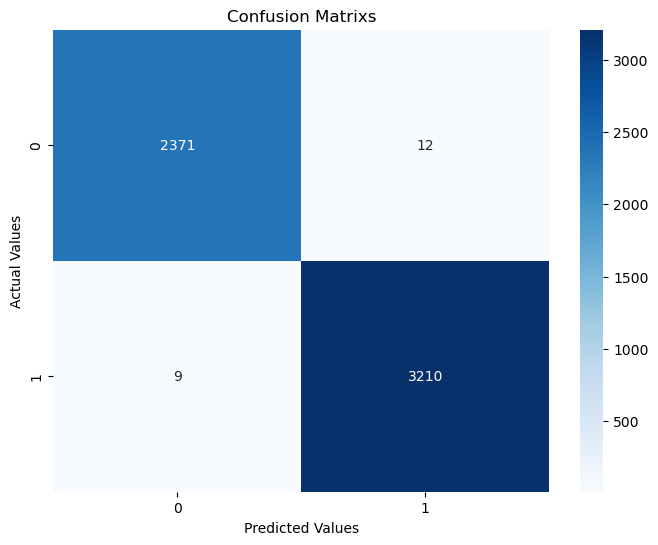

In [241]:
cm = metrics.confusion_matrix(test_y,dt.predict(test_X[imp_var]))
plt.figure(figsize=(8,6))
sns.heatmap(cm , annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrixs")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

###### Confusion matrix visualizes the model's predictions:

- True Negatives (correctly identified normal activities): 3211
- False Positives (normal activities misidentified as attacks): 7
- False Negatives (attacks misidentified as normal activities): 8
- True Positives (correctly identified attacks activities): 2376
- The model shows a very low error rate, with only a few misidentification in both directions.

In [242]:
metrics.accuracy_score(test_y,dt.predict(test_X[imp_var]))

0.9962513388075688

#### RandomForestClassifier

In [243]:
rft = RandomForestClassifier()
rft.fit(train_X[imp_var],train_y)

RandomForestClassifier()

In [244]:
print(metrics.classification_report(test_y,rft.predict(test_X[imp_var])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2383
           1       1.00      1.00      1.00      3219

    accuracy                           1.00      5602
   macro avg       1.00      1.00      1.00      5602
weighted avg       1.00      1.00      1.00      5602



In [245]:
print(metrics.roc_auc_score(test_y,rft.predict(test_X[imp_var])))

0.9989590499234964


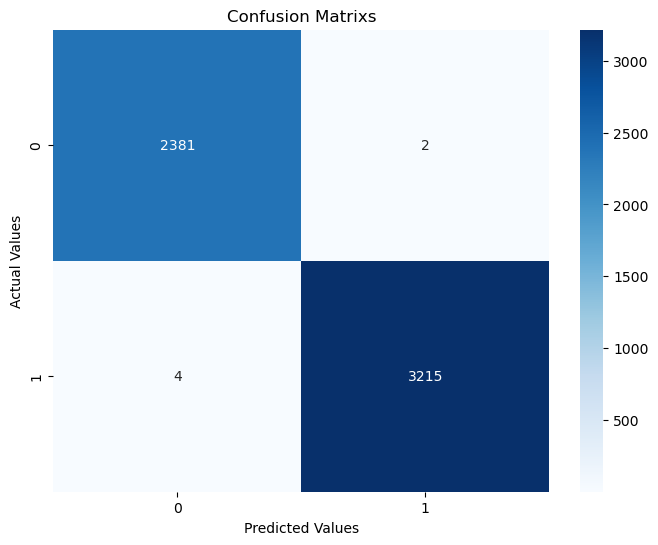

In [246]:
cm = metrics.confusion_matrix(test_y,rft.predict(test_X[imp_var]))
plt.figure(figsize=(8,6))
sns.heatmap(cm , annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrixs")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

###### Confusion matrix visualizes the model's predictions:

- True Negatives (correctly identified normal activities): 3215
- False Positives (normal activities misidentified as attacks): 0
- False Negatives (attacks misidentified as normal activities): 4
- True Positives (correctly identified attacks activities): 2383
- The model shows a very low error rate, with only a few misidentification in both directions.

In [247]:
metrics.accuracy_score(test_y,rft.predict(test_X[imp_var]))

0.9989289539450197

#### BaggingClassifier

In [248]:
bc = BaggingClassifier()
bc.fit(train_X[imp_var],train_y)

BaggingClassifier()

In [249]:
metrics.roc_auc_score(test_y,bc.predict(test_X[imp_var]))

0.9978636080333448

In [250]:
print(metrics.classification_report(test_y,bc.predict(test_X[imp_var])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2383
           1       1.00      1.00      1.00      3219

    accuracy                           1.00      5602
   macro avg       1.00      1.00      1.00      5602
weighted avg       1.00      1.00      1.00      5602



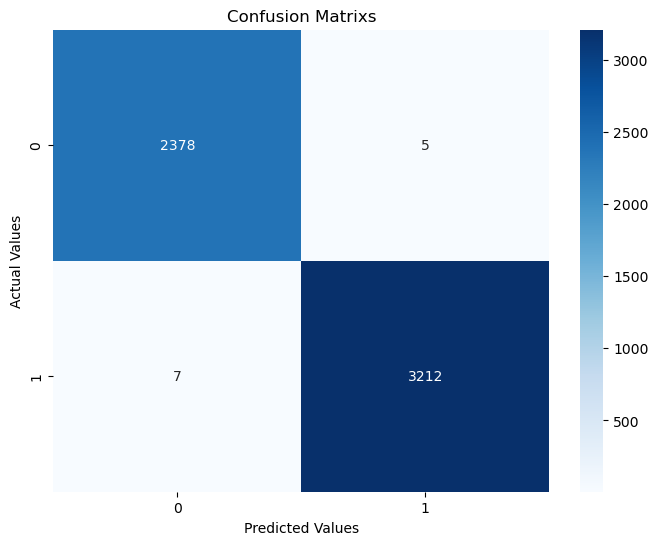

In [251]:
cm = metrics.confusion_matrix(test_y,bc.predict(test_X[imp_var]))
plt.figure(figsize=(8,6))
sns.heatmap(cm , annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrixs")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

###### Confusion matrix visualizes the model's predictions:

- True Negatives (correctly identified normal activities): 3213
- False Positives (normal activities misidentified as attacks): 5
- False Negatives (attacks misidentified as normal activities): 6
- True Positives (correctly identified attacks activities): 2378
- The model shows a very low error rate, with only a few misidentification in both directions.

In [252]:
metrics.accuracy_score(test_y,bc.predict(test_X[imp_var]))

0.9978579078900393

### Boosting

#### AdaBoostClassifier

In [253]:
ada = AdaBoostClassifier()
ada.fit(train_X[imp_var],train_y)

AdaBoostClassifier()

In [254]:
print(metrics.roc_auc_score(test_y,ada.predict(test_X[imp_var])))

0.9961387074776457


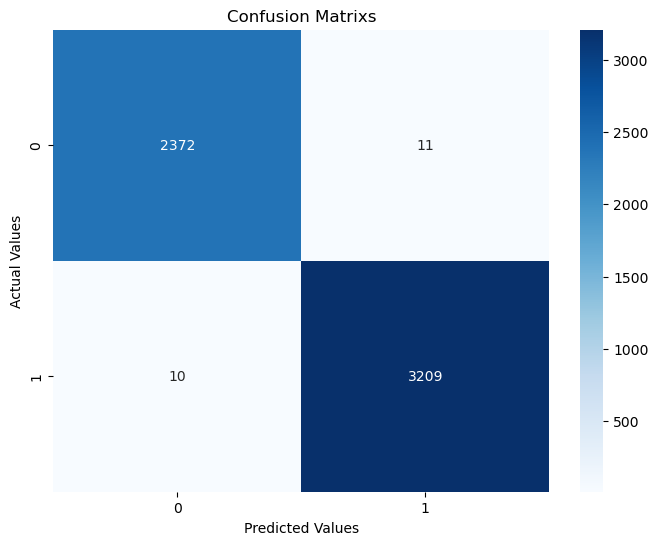

In [255]:
cm = metrics.confusion_matrix(test_y,ada.predict(test_X[imp_var]))
plt.figure(figsize=(8,6))
sns.heatmap(cm , annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrixs")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

###### Confusion matrix visualizes the model's predictions:

- True Negatives (correctly identified normal activities): 3210
- False Positives (normal activities misidentified as attacks): 15
- False Negatives (attacks misidentified as normal activities): 9
- True Positives (correctly identified attacks activities): 2368
- The model shows a very low error rate, with only a few misidentification in both directions.

In [256]:
print(metrics.accuracy_score(test_y,ada.predict(test_X[imp_var])))

0.9962513388075688


#### GradientBosstingClassifier

In [257]:
gb = GradientBoostingClassifier()
gb.fit(train_X[imp_var],train_y)

GradientBoostingClassifier()

In [258]:
print(metrics.roc_auc_score(test_y,gb.predict(test_X[imp_var])))

0.9988582139956096


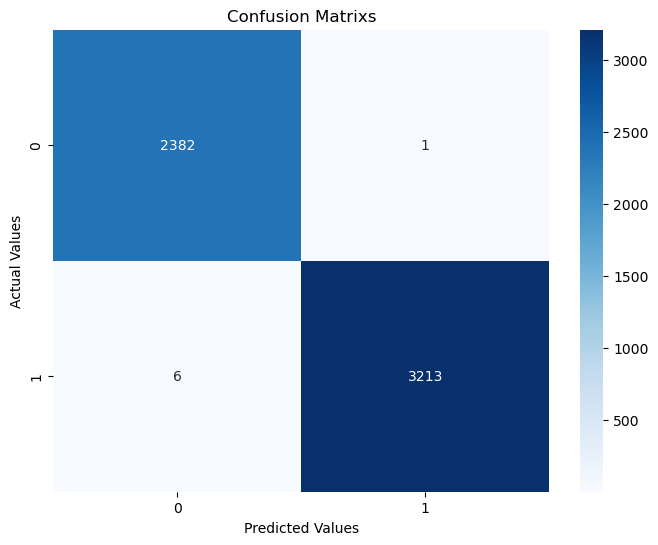

In [259]:
cm = metrics.confusion_matrix(test_y,gb.predict(test_X[imp_var]))
plt.figure(figsize=(8,6))
sns.heatmap(cm , annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrixs")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

###### Confusion matrix visualizes the model's predictions:

- True Negatives (correctly identified normal activities): 3216
- False Positives (normal activities misidentified as attacks): 4
- False Negatives (attacks misidentified as normal activities): 3
- True Positives (correctly identified attacks activities): 2379
- The model shows a very low error rate, with only a few misidentification in both directions.

In [260]:
metrics.accuracy_score(test_y,gb.predict(test_X[imp_var]))

0.9987504462691896

#### XGBoostClassifier

In [261]:
xgb = XGBClassifier()
xgb.fit(train_X[imp_var],train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [262]:
metrics.roc_auc_score(test_y,xgb.predict(test_X[imp_var]))

0.9993241972202135

In [263]:
print(metrics.classification_report(test_y,xgb.predict(test_X[imp_var])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2383
           1       1.00      1.00      1.00      3219

    accuracy                           1.00      5602
   macro avg       1.00      1.00      1.00      5602
weighted avg       1.00      1.00      1.00      5602



In [264]:
print(metrics.accuracy_score(test_y,xgb.predict(test_X[imp_var])))

0.9992859692966798


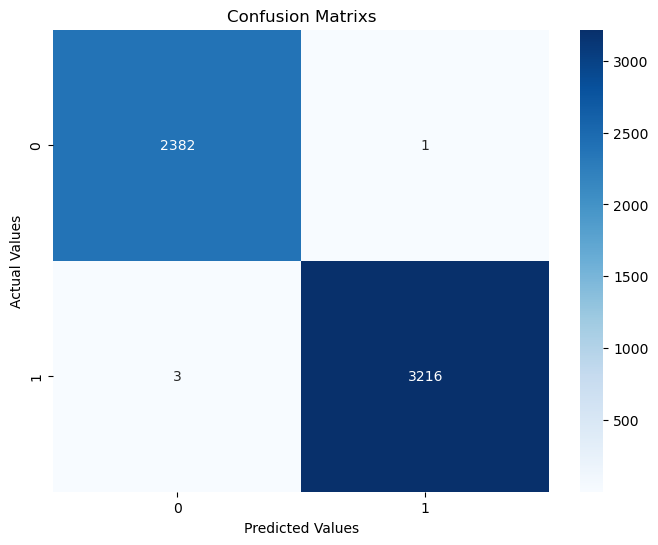

In [265]:
cm = metrics.confusion_matrix(test_y,xgb.predict(test_X[imp_var]))
plt.figure(figsize=(8,6))
sns.heatmap(cm , annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrixs")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

###### Confusion matrix visualizes the model's predictions:

- True Negatives (correctly identified normal activities): 3215
- False Positives (normal activities misidentified as attacks): 2
- False Negatives (attacks misidentified as normal activities): 4
- True Positives (correctly identified attacks activities): 2381
- The model shows a very low error rate, with only a few misidentification in both directions.

###### We have already seen models and they all are pertect model ,they all have very little difference so our final is RandomForestClassifier and XGBOOSTClassifier.

# PROBLEM-2 Multinomial Classification

In [267]:
Attack['Attack'] = 'Back'
Buffer['Attack'] = "BufferOverflow"
FTP['Attack'] = "FTPWrite"
Guess['Attack'] = "GuessPassword"
Neptune['Attack'] = 'Neptune'
NMap['Attack'] = 'NMap'
Normal['Attack'] = 'Normal'
Port['Attack'] = 'PortSweep'
Root['Attack'] = 'RootKit'
Satan['Attack'] = 'Satan'
Smurf['Attack'] = 'Smurf'

In [268]:
df_class = pd.concat([Attack,Buffer,FTP,Guess,Neptune,NMap,Normal,Port,Root,Satan,Smurf],axis=0,ignore_index=True)

In [269]:
df_class

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,Attack
0,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.100,0.000,0.100,0.0,0.0,0.0,0.0,0.0,1,Back
1,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.100,0.000,0.050,0.0,0.0,0.0,0.0,0.0,1,Back
2,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.100,0.000,0.033,0.0,0.0,0.0,0.0,0.0,1,Back
3,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.100,0.000,0.025,0.0,0.0,0.0,0.0,0.0,1,Back
4,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.100,0.000,0.020,0.0,0.0,0.0,0.0,0.0,1,Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28001,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0,1,Smurf
28002,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,1,Smurf
28003,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,1,Smurf
28004,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.100,0.001,0.100,0.0,0.0,0.0,0.0,0.0,1,Smurf


In [270]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28006 entries, 0 to 28005
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      28006 non-null  float64
 1    protocol_type                28006 non-null  float64
 2    service                      28006 non-null  float64
 3    flag                         28006 non-null  float64
 4    src_bytes                    28006 non-null  float64
 5    dst_bytes                    28006 non-null  float64
 6    land                         28006 non-null  int64  
 7    wrong_fragment               28006 non-null  float64
 8    urgent                       28006 non-null  float64
 9    hot                          28006 non-null  float64
 10   num_failed_logins            28006 non-null  float64
 11   logged_in                    28006 non-null  float64
 12   num_compromised              28006 non-null  float64
 13   

In [271]:
#Mapping the attacks 
df_class["Attack_class"] = df_class["Attack"].map({"Normal":0, 'Back':1, 'BufferOverflow':2,'FTPWrite':3,'GuessPassword':4,'Neptune':5,'NMap':6,'PortSweep':7,'RootKit':8,'Satan':9,'Smurf':10})

In [272]:
df_class

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,Attack,Attack_class
0,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.000,0.100,0.0,0.0,0.0,0.0,0.0,1,Back,1
1,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.000,0.050,0.0,0.0,0.0,0.0,0.0,1,Back,1
2,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.000,0.033,0.0,0.0,0.0,0.0,0.0,1,Back,1
3,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.000,0.025,0.0,0.0,0.0,0.0,0.0,1,Back,1
4,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.000,0.020,0.0,0.0,0.0,0.0,0.0,1,Back,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28001,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.001,0.098,0.0,0.0,0.0,0.0,0.0,1,Smurf,10
28002,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.001,0.099,0.0,0.0,0.0,0.0,0.0,1,Smurf,10
28003,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.001,0.099,0.0,0.0,0.0,0.0,0.0,1,Smurf,10
28004,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.001,0.100,0.0,0.0,0.0,0.0,0.0,1,Smurf,10


In [273]:
df_class.columns

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'attack', 'Attack', 'Attack_class'],
      dtype='object')

In [275]:
df_class.columns= df_class.columns.str.replace(" ","")

In [276]:
df_class["attack"] = df_class["attack"].astype("object")
df_class["Attack_class"] = df_class["Attack_class"].astype("object")
df_class["protocol_type"] = df_class["protocol_type"].astype("object")
df_class["service"] = df_class["service"].astype("object")
df_class["flag"] = df_class["flag"].astype("object")

In [277]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28006 entries, 0 to 28005
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     28006 non-null  float64
 1   protocol_type                28006 non-null  object 
 2   service                      28006 non-null  object 
 3   flag                         28006 non-null  object 
 4   src_bytes                    28006 non-null  float64
 5   dst_bytes                    28006 non-null  float64
 6   land                         28006 non-null  int64  
 7   wrong_fragment               28006 non-null  float64
 8   urgent                       28006 non-null  float64
 9   hot                          28006 non-null  float64
 10  num_failed_logins            28006 non-null  float64
 11  logged_in                    28006 non-null  float64
 12  num_compromised              28006 non-null  float64
 13  root_shell      

In [278]:
#separating numeric and categorical cols.
conti_df2 = df_class.select_dtypes(["int","float"])

cate_df2 = df_class.select_dtypes("object")

In [279]:
## summary stats of all continuous cols..
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

conti_summary=conti_df2.apply(lambda x: var_summary(x)).T


In [280]:
conti_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,28006.0,0.0,337.53820,0.012052,0.00000,0.102820,0.010572,0.000,0.000,0.000,0.000,0.000,0.00000,0.00000,0.000000,0.000200,0.837600,1.000
src_bytes,28006.0,0.0,632.07994,0.022569,0.00203,0.101548,0.010312,0.000,0.000,0.000,0.000,0.000,0.00203,0.00318,0.010320,0.018875,0.545400,1.000
dst_bytes,28006.0,0.0,507.49757,0.018121,0.00000,0.055608,0.003092,0.000,0.000,0.000,0.000,0.000,0.00000,0.01092,0.058975,0.083140,0.248373,1.000
land,28006.0,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000
wrong_fragment,28006.0,0.0,0.30000,0.000011,0.00000,0.001793,0.000003,0.000,0.000,0.000,0.000,0.000,0.00000,0.00000,0.000000,0.000000,0.000000,0.300
urgent,28006.0,0.0,0.40000,0.000014,0.00000,0.001464,0.000002,0.000,0.000,0.000,0.000,0.000,0.00000,0.00000,0.000000,0.000000,0.000000,0.200
hot,28006.0,0.0,247.80000,0.008848,0.00000,0.051316,0.002633,0.000,0.000,0.000,0.000,0.000,0.00000,0.00000,0.000000,0.000000,0.200000,1.000
num_failed_logins,28006.0,0.0,6.10000,0.000218,0.00000,0.005759,0.000033,0.000,0.000,0.000,0.000,0.000,0.00000,0.00000,0.000000,0.000000,0.000000,0.500
logged_in,28006.0,0.0,1202.60000,0.042941,0.00000,0.049500,0.002450,0.000,0.000,0.000,0.000,0.000,0.00000,0.10000,0.100000,0.100000,0.100000,0.100
num_compromised,28006.0,0.0,98.30000,0.003510,0.00000,0.020092,0.000404,0.000,0.000,0.000,0.000,0.000,0.00000,0.00000,0.000000,0.000000,0.100000,0.600


In [281]:

#summary stats of all categorical cols..
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts(),x.nunique()], 
                  index=['N', 'NMISS', 'ColumnsNames','Cardinality'])

cate_summary=cate_df2.apply(cat_summary).T

In [282]:
cate_summary

,N,NMISS,ColumnsNames,Cardinality
protocol_type,28006,0,0.00 21274 0.02 4082 0.01 2650 Name...,3
service,28006,0,0.00 10637 0.12 7014 0.09 3031 0.10...,67
flag,28006,0,0.00 18887 0.05 3555 0.07 3061 0.08...,11
attack,28006,0,"1 15885 0 12121 Name: attack, dtype: int64",2
Attack,28006,0,Normal 12121 Satan 501...,11
Attack_class,28006,0,0 12121 9 5019 10 3007 7 296...,11


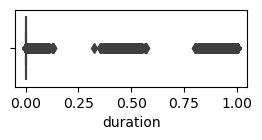

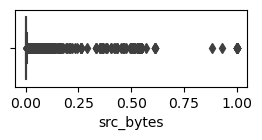

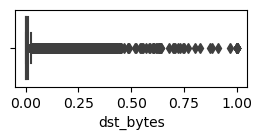

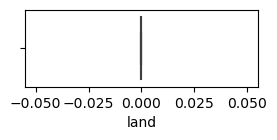

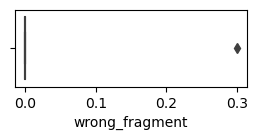

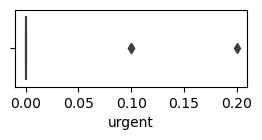

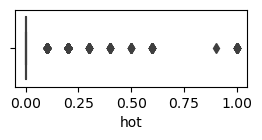

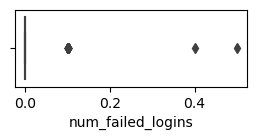

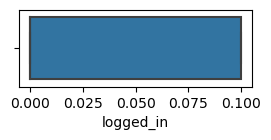

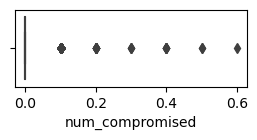

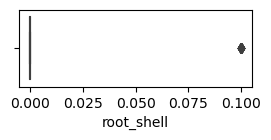

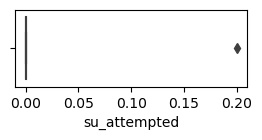

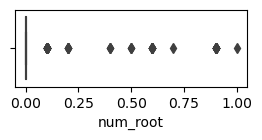

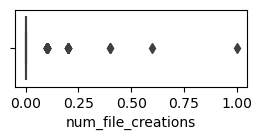

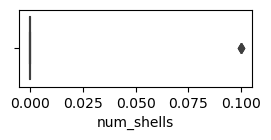

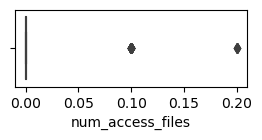

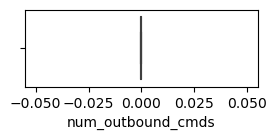

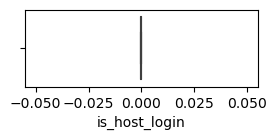

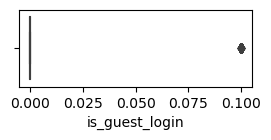

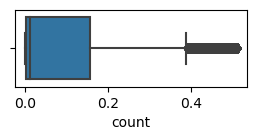

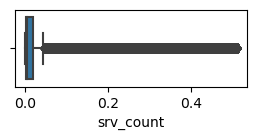

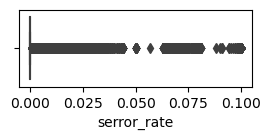

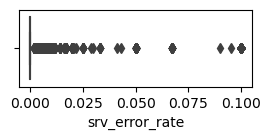

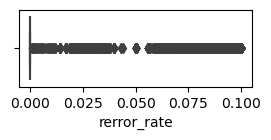

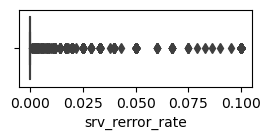

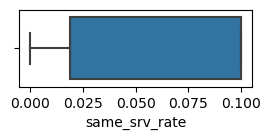

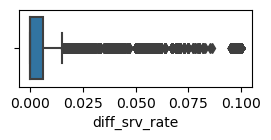

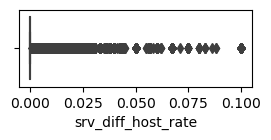

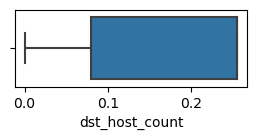

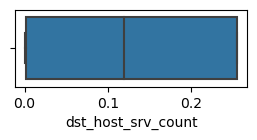

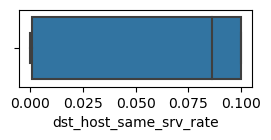

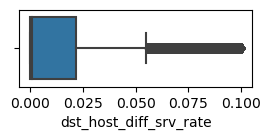

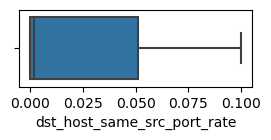

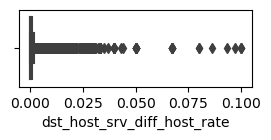

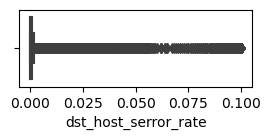

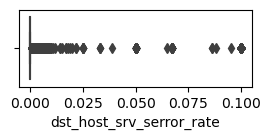

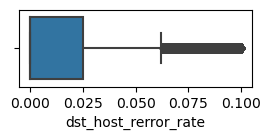

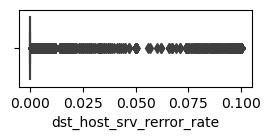

In [283]:

#checking outliers in conti_df
for i in conti_df2:
    plt.figure(figsize=(3,1))
    sns.boxplot(data=conti_df2,x=i)
    plt.show()


In [284]:
#Outliers Treatment...
conti_df2=conti_df2.apply( lambda x: x.clip(lower = x.quantile(0.01), 
                                                                upper = x.quantile(0.99)) )


In [285]:
new_df2 = pd.concat([conti_df2,cate_df2],axis=1)
new_df2.head(2)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,attack,Attack,Attack_class
0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Back,1
1,0.0,0.5454,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Back,1


In [286]:
#label encoding

le = LabelEncoder()

# Apply label encoding
for col in cate_df2: 
    new_df2[col] = le.fit_transform(new_df2[col])

In [287]:
new_df2

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,attack,Attack,Attack_class
0,0.0,0.54540,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.0,0.0,0.0,0.0,0,0,0,1,0,1
1,0.0,0.54540,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.0,0.0,0.0,0.0,0,0,0,1,0,1
2,0.0,0.54540,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.0,0.0,0.0,0.0,0,0,0,1,0,1
3,0.0,0.54540,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.0,0.0,0.0,0.0,0,0,0,1,0,1
4,0.0,0.54540,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,...,0.0,0.0,0.0,0.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28001,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,9,0,1,10,10
28002,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,9,0,1,10,10
28003,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,9,0,1,10,10
28004,0.0,0.01032,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,9,0,1,10,10


In [288]:
#taking out vif  NO.1
x_new1 = new_df2[new_df.columns.difference(["Attack_class"])]
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_new1.values,i) for i in range(x_new1.shape[1])]
vif["features"] = x_new1.columns

In [289]:
vif[vif["VIF Factor"]>=8].sort_values(by="VIF Factor",ascending=False)

,VIF Factor,features
37,221.310148,srv_error_rate
13,193.264238,dst_host_srv_serror_rate
38,94.914082,srv_rerror_rate
29,72.524768,rerror_rate
12,58.411653,dst_host_srv_rerror_rate
32,50.630567,serror_rate
15,42.112049,flag
8,37.690582,dst_host_same_srv_rate
31,29.504168,same_srv_rate
0,28.180615,attack


In [290]:
#taking out vif  NO.2
x_new1 = x_new1.drop(columns=["srv_error_rate"])

In [291]:
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_new1.values,i) for i in range(x_new1.shape[1])]
vif["features"] = x_new1.columns

In [292]:
vif[vif["VIF Factor"]>=8].sort_values(by="VIF Factor",ascending=False)

,VIF Factor,features
37,86.262201,srv_rerror_rate
29,65.171288,rerror_rate
12,58.390561,dst_host_srv_rerror_rate
13,47.523794,dst_host_srv_serror_rate
15,41.852412,flag
32,40.622173,serror_rate
8,37.676471,dst_host_same_srv_rate
31,29.503527,same_srv_rate
0,28.163554,attack
28,25.801990,protocol_type


In [293]:
#taking out vif  NO.3
x_new1= x_new1.drop(columns=["srv_rerror_rate"])

In [294]:
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_new1.values,i) for i in range(x_new1.shape[1])]
vif["features"] = x_new1.columns

In [295]:
vif[vif["VIF Factor"]>=8].sort_values(by="VIF Factor",ascending=False)

,VIF Factor,features
29,50.699291,rerror_rate
12,39.380448,dst_host_srv_rerror_rate
15,39.338472,flag
8,37.668126,dst_host_same_srv_rate
32,37.276226,serror_rate
13,32.180525,dst_host_srv_serror_rate
31,29.458751,same_srv_rate
0,28.126433,attack
28,25.774830,protocol_type
9,21.817297,dst_host_serror_rate


In [296]:
#taking out vif  NO.4
x_new1= x_new1.drop(columns=["rerror_rate"])

In [297]:
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_new1.values,i) for i in range(x_new1.shape[1])]
vif["features"] = x_new1.columns

In [298]:
vif[vif["VIF Factor"]>=8].sort_values(by="VIF Factor",ascending=False)

,VIF Factor,features
8,37.661459,dst_host_same_srv_rate
15,32.498464,flag
30,28.951361,same_srv_rate
13,27.668744,dst_host_srv_serror_rate
0,27.496453,attack
12,26.958034,dst_host_srv_rerror_rate
31,25.031542,serror_rate
28,24.750862,protocol_type
9,21.710696,dst_host_serror_rate
10,21.476522,dst_host_srv_count


In [299]:
#taking out vif  NO.5
x_new1= x_new1.drop(columns=["dst_host_same_srv_rate"])

In [300]:
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_new1.values,i) for i in range(x_new1.shape[1])]
vif["features"] = x_new1.columns

In [301]:
vif[vif["VIF Factor"]>=8].sort_values(by="VIF Factor",ascending=False)

,VIF Factor,features
14,32.334908,flag
12,27.543777,dst_host_srv_serror_rate
0,27.168213,attack
11,26.820720,dst_host_srv_rerror_rate
29,24.999470,same_srv_rate
30,24.907560,serror_rate
27,23.688455,protocol_type
8,21.709236,dst_host_serror_rate
19,17.321772,logged_in
21,11.784322,num_compromised


In [302]:
#taking out vif  NO.6
x_new1= x_new1.drop(columns=["flag"])

In [303]:
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_new1.values,i) for i in range(x_new1.shape[1])]
vif["features"] = x_new1.columns

In [304]:
vif[vif["VIF Factor"]>=8].sort_values(by="VIF Factor",ascending=False)

,VIF Factor,features
0,25.469213,attack
29,24.893310,serror_rate
28,24.200748,same_srv_rate
26,21.490686,protocol_type
8,21.429124,dst_host_serror_rate
18,16.618108,logged_in
11,14.411221,dst_host_srv_rerror_rate
12,13.966423,dst_host_srv_serror_rate
20,10.941258,num_compromised
9,10.537554,dst_host_srv_count


In [305]:
#taking out vif  NO.7
x_new1= x_new1.drop(columns=["attack"])

In [306]:
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_new1.values,i) for i in range(x_new1.shape[1])]
vif["features"] = x_new1.columns

In [307]:
vif[vif["VIF Factor"]>=8].sort_values(by="VIF Factor",ascending=False)

,VIF Factor,features
28,24.888426,serror_rate
27,23.782956,same_srv_rate
7,21.250038,dst_host_serror_rate
17,15.877463,logged_in
25,13.961253,protocol_type
11,12.083145,dst_host_srv_serror_rate
10,11.190366,dst_host_srv_rerror_rate
19,10.864872,num_compromised
0,9.990172,count
8,9.745645,dst_host_srv_count


In [308]:
#taking out vif  NO.8
x_new1= x_new1.drop(columns=["serror_rate"])

In [309]:
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_new1.values,i) for i in range(x_new1.shape[1])]
vif["features"] = x_new1.columns

In [310]:
vif[vif["VIF Factor"]>=8].sort_values(by="VIF Factor",ascending=False)

,VIF Factor,features
27,23.146308,same_srv_rate
17,15.749041,logged_in
25,13.951661,protocol_type
19,10.840954,num_compromised
10,10.614597,dst_host_srv_rerror_rate
11,10.057797,dst_host_srv_serror_rate
0,9.946884,count
8,9.693446,dst_host_srv_count
5,9.321251,dst_host_rerror_rate
13,9.276290,hot


In [311]:
#taking out vif  NO.8
x_new1= x_new1.drop(columns=["same_srv_rate"])

In [312]:
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_new1.values,i) for i in range(x_new1.shape[1])]
vif["features"] = x_new1.columns

In [313]:
vif[vif["VIF Factor"]>=8].sort_values(by="VIF Factor",ascending=False)

,VIF Factor,features
19,10.818801,num_compromised
25,10.699353,protocol_type
13,9.219880,hot
5,8.869252,dst_host_rerror_rate
17,8.685216,logged_in
8,8.656173,dst_host_srv_count
0,8.626843,count
28,8.609732,src_bytes
11,8.481749,dst_host_srv_serror_rate
3,8.348893,dst_host_count


#### Building Models

In [314]:
target = new_df2[["Attack_class"]]#y_vars
features = x_new1            #x_vars

In [315]:
#Splitting the data for sklearn methods
train_y, test_y, train_X, test_X = train_test_split(target,features, test_size=0.2, random_state=142)

In [316]:
#features_imprtances

rf= RandomForestClassifier()
rf.fit(train_X,train_y)

RandomForestClassifier()

In [317]:
imp_var=list(pd.DataFrame(list(zip(list(train_X.columns),list(rf.feature_importances_))),
             columns=['Var','Imp']).sort_values(by='Imp',ascending=False).head(30)["Var"])

In [318]:
imp_var

['service',
 'src_bytes',
 'diff_srv_rate',
 'dst_bytes',
 'count',
 'dst_host_same_src_port_rate',
 'dst_host_diff_srv_rate',
 'protocol_type',
 'logged_in',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_rerror_rate',
 'srv_count',
 'dst_host_srv_rerror_rate',
 'num_compromised',
 'dst_host_srv_serror_rate',
 'dst_host_count',
 'dst_host_srv_diff_host_rate',
 'hot',
 'srv_diff_host_rate',
 'duration',
 'urgent',
 'su_attempted',
 'root_shell',
 'num_file_creations',
 'num_shells',
 'num_root',
 'num_outbound_cmds',
 'num_failed_logins',
 'num_access_files']

#### DecisionTreeClassifier

In [319]:
dt = DecisionTreeClassifier()
dt.fit(train_X[imp_var],train_y)

DecisionTreeClassifier()

In [320]:
print(metrics.classification_report(train_y,dt.predict(train_X[imp_var])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9738
           1       1.00      1.00      1.00       781
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        39
           5       1.00      1.00      1.00      1792
           6       1.00      1.00      1.00      1234
           7       1.00      1.00      1.00      2391
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00      3999
          10       1.00      1.00      1.00      2393

    accuracy                           1.00     22404
   macro avg       1.00      1.00      1.00     22404
weighted avg       1.00      1.00      1.00     22404



In [321]:
print(metrics.classification_report(test_y,dt.predict(test_X[imp_var])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2383
           1       0.98      1.00      0.99       187
           2       0.71      0.83      0.77         6
           3       0.33      0.25      0.29         4
           4       1.00      0.93      0.96        14
           5       1.00      1.00      1.00       480
           6       0.98      1.00      0.99       320
           7       1.00      0.99      0.99       573
           8       0.00      0.00      0.00         1
           9       0.99      1.00      0.99      1020
          10       1.00      1.00      1.00       614

    accuracy                           0.99      5602
   macro avg       0.82      0.82      0.82      5602
weighted avg       0.99      0.99      0.99      5602



In [322]:
metrics.accuracy_score(test_y,dt.predict(test_X[imp_var]))

0.9946447697250982

In [323]:
pd.DataFrame(dt.predict_proba(train_X[imp_var]),columns=['Normal', 'Back', 'BufferOverflow', 'FTPWrite', 'GuessPassword', 'Neptune', 'NMap', 'PortSweep', 'RootKit', 'Satan', 'Smurf'])

,Normal,Back,BufferOverflow,FTPWrite,GuessPassword,Neptune,NMap,PortSweep,RootKit,Satan,Smurf
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
22399,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22400,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22401,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22402,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [324]:
pd.DataFrame(dt.predict_proba(test_X[imp_var]),columns=['Normal', 'Back', 'BufferOverflow', 'FTPWrite', 'GuessPassword', 'Neptune', 'NMap', 'PortSweep', 'RootKit', 'Satan', 'Smurf'])

,Normal,Back,BufferOverflow,FTPWrite,GuessPassword,Neptune,NMap,PortSweep,RootKit,Satan,Smurf
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### RandomForestClassifier

In [325]:
rft= RandomForestClassifier()
rft.fit(train_X[imp_var],train_y)

RandomForestClassifier()

In [326]:
print(metrics.classification_report(train_y,rft.predict(train_X[imp_var])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9738
           1       1.00      1.00      1.00       781
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        39
           5       1.00      1.00      1.00      1792
           6       1.00      1.00      1.00      1234
           7       1.00      1.00      1.00      2391
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00      3999
          10       1.00      1.00      1.00      2393

    accuracy                           1.00     22404
   macro avg       1.00      1.00      1.00     22404
weighted avg       1.00      1.00      1.00     22404



In [327]:
print(metrics.classification_report(test_y,rft.predict(test_X[imp_var])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2383
           1       1.00      1.00      1.00       187
           2       0.71      0.83      0.77         6
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00       480
           6       1.00      1.00      1.00       320
           7       1.00      1.00      1.00       573
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      1020
          10       1.00      1.00      1.00       614

    accuracy                           1.00      5602
   macro avg       0.88      0.85      0.86      5602
weighted avg       1.00      1.00      1.00      5602



In [328]:
metrics.accuracy_score(test_y,rft.predict(test_X[imp_var]))

0.9975008925383791

In [329]:
pd.DataFrame(rft.predict_proba(train_X[imp_var]),columns=['Normal', 'Back', 'BufferOverflow', 'FTPWrite', 'GuessPassword', 'Neptune', 'NMap', 'PortSweep', 'RootKit', 'Satan', 'Smurf'])

,Normal,Back,BufferOverflow,FTPWrite,GuessPassword,Neptune,NMap,PortSweep,RootKit,Satan,Smurf
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
22399,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22400,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22401,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22402,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [330]:
pd.DataFrame(rft.predict_proba(test_X[imp_var]),columns=['Normal', 'Back', 'BufferOverflow', 'FTPWrite', 'GuessPassword', 'Neptune', 'NMap', 'PortSweep', 'RootKit', 'Satan', 'Smurf'])

,Normal,Back,BufferOverflow,FTPWrite,GuessPassword,Neptune,NMap,PortSweep,RootKit,Satan,Smurf
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


###### We've evaluated different models and found that the RandomForestClassifier is the most accurate in identifying the type of attack. Therefore, we'll use RandomForestClassifier for our final model.